<a href="https://colab.research.google.com/github/bkestelman/XOR_minima_study/blob/master/XOR_minima_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
class XOR_Net(nn.Module):
  def __init__(self, activation, use_softmax=True):
    super().__init__()
    self.h = nn.Linear(2, 2)
    self.activation = activation
    self.out = nn.Linear(2, 1)
    self.use_softmax = use_softmax
    self.softmax = nn.Sigmoid()

  def forward(self, x):
    x = self.h(x)
    x = self.activation(x)
    x = self.out(x)
    if self.use_softmax:
      x = self.softmax(x)
    return x

In [3]:
def train(net, criterion, optimizer, epochs=1000, batch_size=1, label='Train', plot=True, fixed_input=None):
  losses = []
  plot_epochs = []
  for epoch in range(epochs):
    optimizer.zero_grad()
    if fixed_input is not None:
      X = fixed_input
    else:
      X = torch.randint(2, (batch_size, 2), dtype=torch.float32) # random input from [0, 0], [0, 1], [1, 0], or [1, 1]
    y = torch.sum(X, dim=1) % 2 # XOR
    y = torch.unsqueeze(y, 1)
    out = net.forward(X)
    loss = criterion(out, y)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
      losses.append(loss)
      plot_epochs.append(epoch)
  if plot:
    plt.plot(plot_epochs, losses, label=label)

def test(net):
  X = torch.tensor([[0.,0.], [0.,1.], [1.,0.], [1.,1.]])
  out = net.forward(X)
  return out

***Trial 0***
Output on [[0,0], [0,1], [1,0], [1,1]]:
tensor([0.0017, 0.9992, 0.6240, 0.6251], grad_fn=<SelectBackward0>)
Loss 0.36377590894699097

***Trial 1***
Output on [[0,0], [0,1], [1,0], [1,1]]:
tensor([0.0019, 0.9980, 0.9979, 0.0033], grad_fn=<SelectBackward0>)
Loss 0.0023530384059995413

***Trial 2***
Output on [[0,0], [0,1], [1,0], [1,1]]:
tensor([0.0020, 0.9981, 0.9980, 0.0033], grad_fn=<SelectBackward0>)
Loss 0.00230705295689404

***Trial 3***
Output on [[0,0], [0,1], [1,0], [1,1]]:
tensor([0.0021, 0.9971, 0.9980, 0.0019], grad_fn=<SelectBackward0>)
Loss 0.0022450920660048723

***Trial 4***
Output on [[0,0], [0,1], [1,0], [1,1]]:
tensor([0.0020, 0.9979, 0.9978, 0.0033], grad_fn=<SelectBackward0>)
Loss 0.0023966499138623476

***Trial 5***
Output on [[0,0], [0,1], [1,0], [1,1]]:
tensor([7.9295e-04, 9.9837e-01, 4.2241e-01, 4.2353e-01], grad_fn=<SelectBackward0>)
Loss 0.35375940799713135

***Trial 6***
Output on [[0,0], [0,1], [1,0], [1,1]]:
tensor([0.0019, 0.9980, 0.9981, 0.00

Text(0, 0.5, 'Loss')

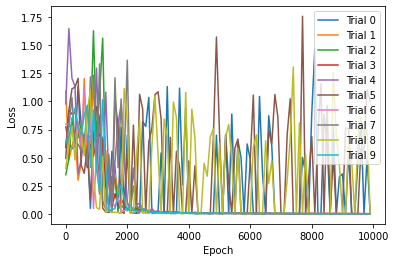

In [4]:
trials = 10
torch.set_printoptions(linewidth=200)
activation = nn.Sigmoid()
learning_rate = 0.5
criterion = nn.BCELoss()
batch_size = 1
for i in range(trials):
  print(f'***Trial {i}***')
  net = XOR_Net(activation=activation, use_softmax=True)
  train(net, criterion, optim.SGD(net.parameters(), lr=learning_rate), epochs=10000, batch_size=batch_size, label=f'Trial {i}')
  test_out = test(net)
  print('Output on [[0,0], [0,1], [1,0], [1,1]]:')
  print(test_out[:,0])
  loss = criterion(test_out, torch.tensor([[0.], [1.], [1.], [0.]]))
  print('Loss', loss.item())
  if loss > 0.1:
    trapped_net = net
  # print('Hidden layer weights')
  # print(net.h.weight)
  # print('Output layer weights')
  # print(net.out.weight)
  print()
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [5]:
# gradients of the trapped network are very close to 0 (except the bias on the output layer, which is irrelevant)
print(trapped_net.h.weight.grad)
print(trapped_net.out.weight.grad)
print(trapped_net.h.bias.grad)
print(trapped_net.out.bias.grad)

tensor([[-6.9680e-06, -6.9680e-06],
        [ 1.0779e-03,  1.0779e-03]])
tensor([[8.1215e-07, 1.3014e-04]])
tensor([-6.9680e-06,  1.0779e-03])
tensor([0.4740])


In [6]:
print(trapped_net.h.weight)
print(trapped_net.out.weight)
print(trapped_net.h.bias)
print(trapped_net.out.bias)

Parameter containing:
tensor([[-9.8095, -5.0396],
        [-9.9222,  4.8856]], requires_grad=True)
Parameter containing:
tensor([[-8.5797,  8.2850]], requires_grad=True)
Parameter containing:
tensor([ 1.5721, -3.1651], requires_grad=True)
Parameter containing:
tensor([-0.3433], requires_grad=True)


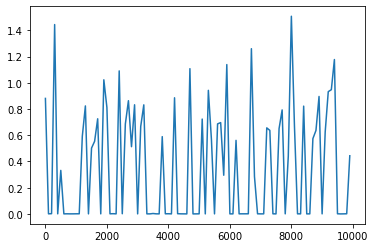

In [7]:
# we can keep training the trapped network, but it will stay trapped
train(trapped_net, criterion, optim.SGD(trapped_net.parameters(), lr=learning_rate), epochs=10000, batch_size=batch_size, label=f'Trapped net')

In [8]:
# weights tend to keep growing farther into the asymptotic flat region
print(trapped_net.h.weight)
print(trapped_net.out.weight)
print(trapped_net.h.bias)
print(trapped_net.out.bias)

Parameter containing:
tensor([[-10.7595,  -5.3086],
        [-10.8551,   5.1369]], requires_grad=True)
Parameter containing:
tensor([[-9.3637,  9.0756]], requires_grad=True)
Parameter containing:
tensor([ 1.6871, -3.2562], requires_grad=True)
Parameter containing:
tensor([-0.6454], requires_grad=True)
